<a href="https://colab.research.google.com/github/simoneperazzoli/IGTI_MLAnalystBootcamp/blob/master/module_2/challenges/challenge_module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#importando as bibliotecas
import pandas as pd
import numpy as np
from google.colab import files 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [55]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [56]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="winequality-red.csv"
challenge = pd.read_csv(nome_do_arquivo, sep=';')

In [57]:
challenge.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [58]:
# No dataset utilizado para o desafio, quantas instâncias (linhas) e atributos (colunas) existem, respectivamente?
challenge.shape

(1599, 12)

In [59]:
challenge.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [60]:
# Quantos tipos diferentes de dados existem no dataset do desafio?

challenge.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [61]:
len(challenge.dtypes.unique())

2

In [62]:
# Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açucar)?

challenge.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [63]:
challenge['residual sugar'].isna().sum()

0

In [64]:
# Qual é o desvio padrão para a variável "fixed acidity" ?

challenge['fixed acidity'].std()

1.7410963181277006

In [65]:
# Qual é a mediana para a variável "residual sugar"?

challenge['residual sugar'].median()

2.2

In [66]:
# Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH" é CORRETO afirmar:

  # **Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".
  # Existe uma correlação negativa. Quanto maior o "fixed acidity, maior é o "pH".
  # Existe uma correlação positiva. Quanto maior o "fixed acidity, menor é o "pH".
  # Existe uma correlação negativa. Quanto menor o "fixed acidity, menor é o "pH".

challenge[['fixed acidity','pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


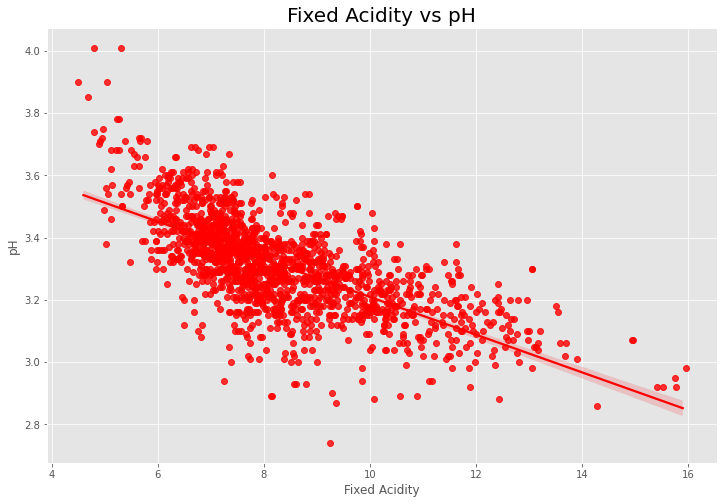

In [85]:
plt.figure(figsize=(12, 8))
sns.regplot(x='fixed acidity', y='pH', data=challenge, color='r', x_jitter=0.2)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.title('Fixed Acidity vs pH', fontsize=20)
plt.show();

In [68]:
# Mesmo sendo reduzido, é CORRETO dizer sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol":
  # Quanto maior o teor alcoolico (alcohol), menor é a qualidade do vinho (quality).
  # Quanto maior o teor alcoolico (alcohol), maior é a qualidade do vinho (quality).
  # Para analisar correlação é necessário que o coeficiente seja superior a 1.
  # **Não é possível dizer nada sobre a correlação entre as variáveis.

#  coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol"
challenge_scaler = challenge
scaler = MinMaxScaler()
challenge_scaler = scaler.fit_transform(challenge_scaler)

# Retornando scaler a um modelo dataframe
colunas = list(challenge.columns)
challenge_scaler = pd.DataFrame(data=challenge_scaler, columns=colunas)

# Correlação das variáveis
challenge_scaler[['quality','alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


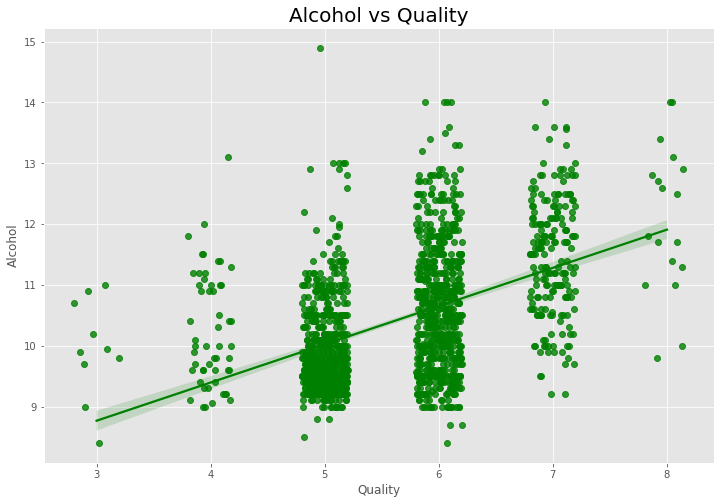

In [84]:
plt.figure(figsize=(12, 8))
sns.regplot(y='alcohol', x='quality', data=challenge, color='g', x_jitter=0.2)
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Alcohol vs Quality', fontsize=20)
plt.show();

In [70]:
challenge[['quality','alcohol']].sort_values('quality', ascending=False)

,quality,alcohol
495,8,11.0
1403,8,10.0
390,8,12.9
1061,8,12.5
1202,8,11.7
...,...,...
690,3,10.7
1478,3,10.2
899,3,11.0
1299,3,10.9


In [69]:
challenge_scaler[['quality','alcohol']].sort_values('quality', ascending=False)

,quality,alcohol
495,1.0,0.400000
1403,1.0,0.246154
390,1.0,0.692308
1061,1.0,0.630769
1202,1.0,0.507692
...,...,...
690,0.0,0.353846
1478,0.0,0.276923
899,0.0,0.400000
1299,0.0,0.384615


In [71]:
# Quantas instâncias existem para a qualidade do vinho igual a 5?

challenge.query('quality == 5').shape[0]

681

In [72]:
# Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

challenge_scaler = challenge.drop(columns='quality')
scaler = MinMaxScaler()
challenge_scaler = scaler.fit_transform(challenge_scaler)

# Retornando scaler a um modelo dataframe
colunas = list(challenge.columns)
colunas.remove('quality')
challenge_scaler = pd.DataFrame(data=challenge_scaler, columns=colunas)
challenge_scaler['fixed acidity'].min()

0.0

In [73]:
challenge_scaler.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?

X = challenge_scaler
y = challenge.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Aplicando o KNN
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)
clf_KNN.score(X_test, y_test)

0.5645833333333333

In [75]:
# Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste como mostrado, anteriormente. Qual é o valor da acurácia?

clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)
clf_arvore.score(X_test, y_test)

0.6

In [76]:
# Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?

clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
clf_floresta.score(X_test, y_test)

0.6791666666666667

In [77]:
# Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?

clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)
clf_svm.score(X_test, y_test)

0.5854166666666667

In [78]:
# Apicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?

clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(X_train, y_train)
clf_mlp.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6

In [79]:
# Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). 
# Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?

challenge_bin = challenge
challenge_bin['quality_bin'] = challenge['quality'] > 5

X = challenge_scaler
y = challenge.quality_bin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf_floresta_bin = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta_bin.fit(X_train, y_train)
clf_floresta_bin.score(X_test, y_test)

0.8041666666666667